<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

## Подготовка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

In [3]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [7]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

In [8]:
#проверка правильности расчета rougher.output.recovery
rougher_output_recovery_check = (
    (data_train['rougher.output.concentrate_au']*
    (data_train['rougher.input.feed_au'] - data_train['rougher.output.tail_au']))/
    (data_train['rougher.input.feed_au']*
    (data_train['rougher.output.concentrate_au'] - data_train['rougher.output.tail_au']))*100
)

In [9]:
mean_absolute_error(rougher_output_recovery_check, data_train['rougher.output.recovery'])

9.73512347450521e-15

In [10]:
data_full.shape

(19439, 87)

In [11]:
data_test.shape

(5290, 53)

In [12]:
#список отсутствующих столбцов в тестовой выборке
data_full_col = data_full.columns
data_full_col[data_full_col.isin(data_test.columns) == False]

Index(['final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_sol', 'final.output.concentrate_au',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb',
       'final.output.tail_sol', 'final.output.tail_au',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb',
       'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au',
       'rougher.calculation.sulfate_to_au_concentrate',
       'rougher.calculation.floatbank10_sulfate_to_au_feed',
       'rougher.calculation.floatbank11_sulfate_to_au_feed',
       'rougher.calculation.au_pb_ratio', 'rougher.output.concentrate_ag',
       'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol',
       'rougher.output.concentrate_au', 'rougher.outpu

In [13]:
data_full.fillna(method='ffill', inplace=True)

In [14]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19439 non-null  float64
 2   final.output.concentrate_pb                         19439 non-null  float64
 3   final.output.concentrate_sol                        19439 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19439 non-null  float64
 7   final.output.tail_pb                                19439 non-null  float64
 8   final.output.tail_sol                               19439 non-null  float64


In [15]:
data_train.fillna(method='ffill', inplace=True)

In [16]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14149 non-null  float64
 2   final.output.concentrate_pb                         14149 non-null  float64
 3   final.output.concentrate_sol                        14149 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14149 non-null  float64
 8   final.output.tail_sol                               14149 non-null  float64


In [17]:
data_test.fillna(method='ffill', inplace=True)

In [18]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5290 non-null   float64
 2   primary_cleaner.input.depressant            5290 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5290 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

### Вывод:
- были загружены данные, сохранены в таблицах data_full,data_train,data_test
- была рассчитана эффективность обогащения на обучающей выборке для признака rougher.output.recovery
- было рассчитано значение средней абсолютной ошибки 9.73512347450521e-15
- в тестовой выборке отсутвуют выходные параметры, описывающие концентрацию хим веществ (pb,au,ag,sol) на разных этапах (final,primary_cleaner, rougher,secondary_cleaner) и отвальных хвостах
- в данных имеются пропуски, пропуски были заполнены соседними значениями, так как значения параметров снимаются в определенные интервалы времени, и значения будут близкими

## Анализ данных

### Концентрация металлов (Au, Ag, Pb) на различных этапах очистки

<AxesSubplot:>

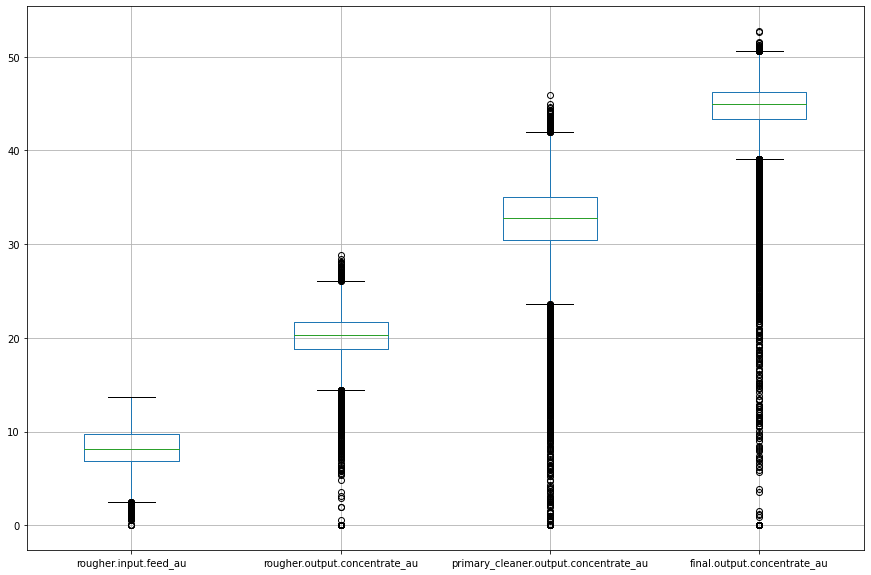

In [19]:
(
    data_full[['rougher.input.feed_au',
               'rougher.output.concentrate_au',
               'primary_cleaner.output.concentrate_au',
               'final.output.concentrate_au']].
    boxplot(figsize = (15,10))
)

<AxesSubplot:>

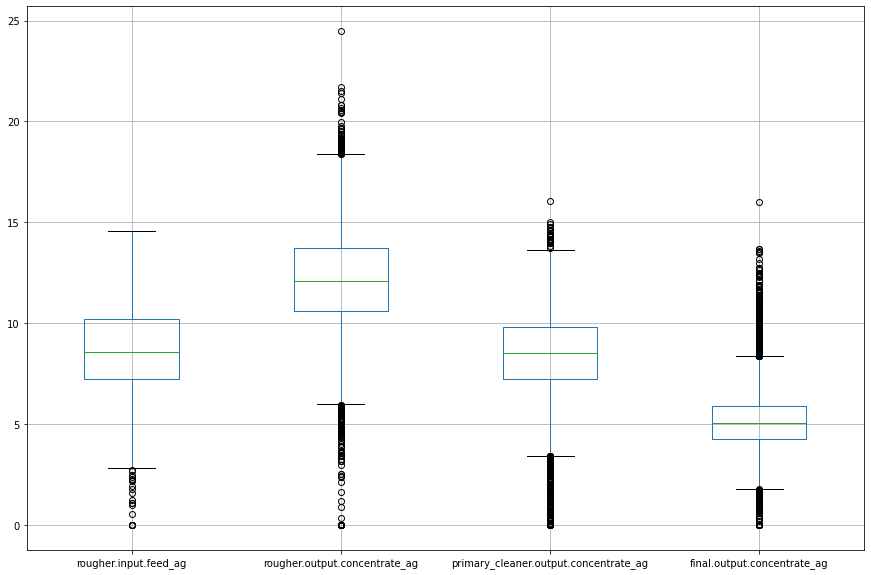

In [20]:
(
    data_full[['rougher.input.feed_ag',
               'rougher.output.concentrate_ag',
               'primary_cleaner.output.concentrate_ag',
               'final.output.concentrate_ag']].
    boxplot(figsize = (15,10))
)

<AxesSubplot:>

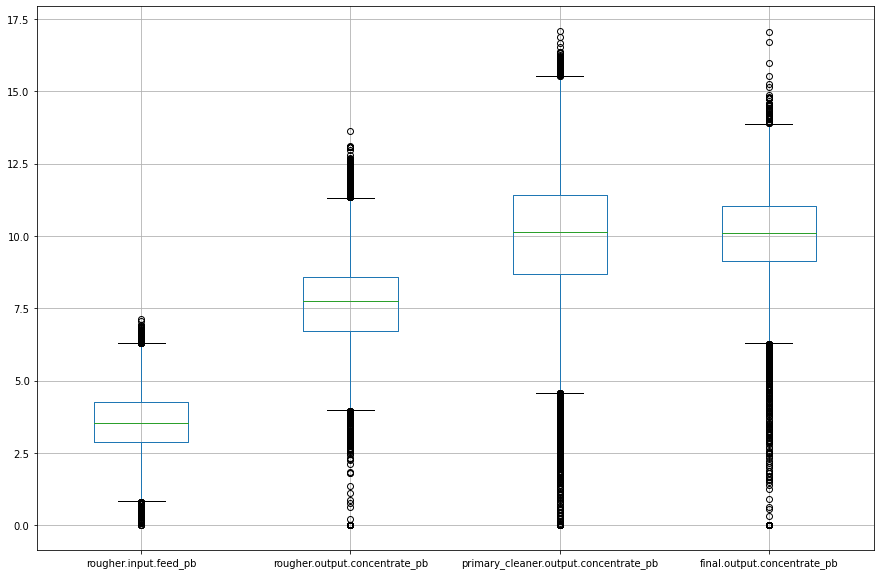

In [21]:
(
    data_full[['rougher.input.feed_pb',
               'rougher.output.concentrate_pb',
               'primary_cleaner.output.concentrate_pb',
               'final.output.concentrate_pb']].
    boxplot(figsize = (15,10))
)

#### Вывод:
 - концентрация золота увеличивается с каждым этапом (20, 32, 45). Разброс увеличивается на этапе primary и снижается на final. Имеются выбросы
 - концентрация серебра снижается с каждым этапом очистки (12,8,5). Разброс уменьшается. Имеются выбросы
 - концентрация свинца увеличивается от этапа rougher к primary (7.5 ,10 ,10). Разброс увеличивается на этапе primary и снижается на final. Имеются выбросы

### Распределения размеров гранул сырья на обучающей и тестовой выборках

In [22]:
#статистика тестовой выборки
data_test['rougher.input.feed_au'].describe()

count    5290.000000
mean        9.334682
std         1.619521
min         0.568632
25%         8.207814
50%         9.593766
75%        10.463538
max        13.731330
Name: rougher.input.feed_au, dtype: float64

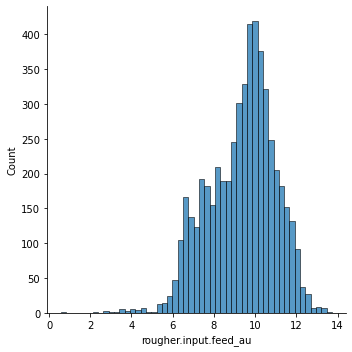

In [23]:
sns.displot(data_test['rougher.input.feed_au']);

In [24]:
#статистика обучающей выборки
data_train['rougher.input.feed_au'].describe()

count    14149.000000
mean         7.866577
std          1.919506
min          0.010000
25%          6.596217
50%          7.649138
75%          9.066976
max         13.126043
Name: rougher.input.feed_au, dtype: float64

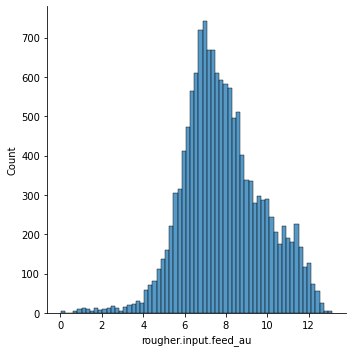

In [25]:
sns.displot(data_train['rougher.input.feed_au']);

#### Вывод:
- были построены распределения золота в исходном сырье для тестовой и обучающей выборок
- среднее значения на тестовой выборке - 9.3, стандартное отклонение - 1.6, межквартильный размах - 2.3, нормальное распределение.
- среднее значения на обучающей выборке - 7.9, стандартное отклонение - 1.9, межквартильный размах - 2.5, нормальное распределение
- средние двух выборок различаются на 1,4, что меньше стандартного отклонения

### Суммарная концентрация всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах

In [26]:
#Функция для построения гистограмм
def hist(data,columns):
    for column in columns:
        print(column)
        data[column].hist(legend=True)
        plt.show()
        print()

In [27]:
new_data = pd.DataFrame()

In [28]:
#суммарная концентрация в исходном сырье
new_data['rougher.input.feed_total'] = (
    data_full['rougher.input.feed_ag']+
    data_full['rougher.input.feed_au']+
    data_full['rougher.input.feed_pb']+
    data_full['rougher.input.feed_sol']
)

In [29]:
#суммарная концентрация на этапе rougher
new_data['rougher.output.concentrate_total'] = (
    data_full['rougher.output.concentrate_ag']+
    data_full['rougher.output.concentrate_au']+
    data_full['rougher.output.concentrate_pb']+
    data_full['rougher.output.concentrate_sol']
)

In [30]:
#суммарная концентрация на этапе primary
new_data['primary_cleaner.output.concentrate_total'] = (
    data_full['primary_cleaner.output.concentrate_ag']+
    data_full['primary_cleaner.output.concentrate_au']+
    data_full['primary_cleaner.output.concentrate_pb']+
    data_full['primary_cleaner.output.concentrate_sol']
)

In [31]:
#суммарная концентрация на этапе final
new_data['final.output.concentrate_total'] = (
    data_full['final.output.concentrate_ag']+
    data_full['final.output.concentrate_au']+
    data_full['final.output.concentrate_pb']+
    data_full['final.output.concentrate_sol']
)

In [32]:
new_data.describe()

,rougher.input.feed_total,rougher.output.concentrate_total,primary_cleaner.output.concentrate_total,final.output.concentrate_total
count,19439.000000,19439.000000,19439.000000,19439.000000
mean,57.320789,68.170865,60.764731,68.653624
std,7.212680,12.491279,10.017271,7.427536
min,0.040000,0.000000,0.000000,0.000000
25%,53.557679,66.012495,58.929364,67.932362
50%,57.594391,70.181495,62.497674,69.598444
75%,61.953459,74.356904,65.667336,71.368472
max,76.978947,88.140119,80.749343,80.210644


rougher.input.feed_total


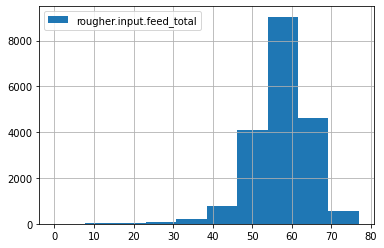


rougher.output.concentrate_total


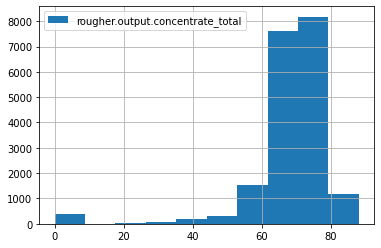


primary_cleaner.output.concentrate_total


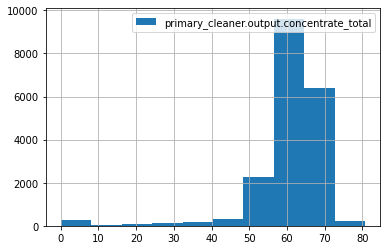


final.output.concentrate_total


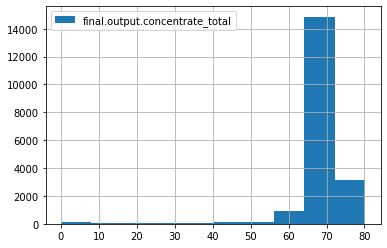

In [33]:
hist(new_data,new_data.columns)

In [34]:
#расчет суммарной концентрации в data_train input_feed
data_train['rougher_input_feed_total'] = (
    data_train['rougher.input.feed_ag']+
    data_train['rougher.input.feed_au']+
    data_train['rougher.input.feed_pb']+
    data_train['rougher.input.feed_sol']
)

In [35]:
data_train.query('rougher_input_feed_total == 0')

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher_input_feed_total


In [36]:
#расчет суммарной концентрации в data_train rougher_output
data_train['rougher_output_concentrate_total'] = (
    data_train['rougher.output.concentrate_ag']+
    data_train['rougher.output.concentrate_au']+
    data_train['rougher.output.concentrate_pb']+
    data_train['rougher.output.concentrate_sol']
)
data_train = data_train.query('rougher_output_concentrate_total != 0')

In [37]:
#расчет суммарной концентрации в data_train primary_cleaner
data_train['primary_cleaner_output_concentrate_total'] = (
    data_train['primary_cleaner.output.concentrate_ag']+
    data_train['primary_cleaner.output.concentrate_au']+
    data_train['primary_cleaner.output.concentrate_pb']+
    data_train['primary_cleaner.output.concentrate_sol']
)

In [38]:
data_train = data_train.query('primary_cleaner_output_concentrate_total != 0')

In [39]:
#расчет суммарной концентрации в data_train final.output
data_train['final_output_concentrate_total'] = (
    data_train['final.output.concentrate_ag']+
    data_train['final.output.concentrate_au']+
    data_train['final.output.concentrate_pb']+
    data_train['final.output.concentrate_sol']
)

In [40]:
data_train = data_train.query('final_output_concentrate_total != 0')

#### Вывод:
- были построены гистограммы суммарной концентрации веществ на 3 этапах очистки.
- сСредне значение концентрации веществ на первом и третьем этапах равны 68, на втором - 60. Концентрация вещест не снизилась от первого ктретьему этапу, так как уменьшается концентрация других веществ и увеличивается концентрация золота (как видели в пункте 2.1).
- с каждым этапом очистки cтандартное отклоение уменьшаются, разброс становится меньше
- среди значений имеются наблюдения с 0 концентрацией веществ на всех 3 этапах, следовательно попадается пустая порода

### Функция для вычисления sMAPE

In [41]:
def SMAPE(y_true, y_pred):
    error = np.abs(y_true - y_pred)
    scale = (np.abs(y_true) + np.abs(y_pred)) / 2 + 0.000000001
    result = (error / scale).mean()
    return result

In [42]:
def final_SMAPE(s1,s2):
    return 0.25*s1+0.75*s2

### Построение модели для пердсказания rougher.output.recovery

In [43]:
#features
x_train_rougher = (
    data_train[
        [
             'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_rate',
       'rougher.input.feed_size', 'rougher.input.feed_sol',
       'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level', 'rougher.state.floatbank10_b_air',
       'rougher.state.floatbank10_b_level', 'rougher.state.floatbank10_c_air',
       'rougher.state.floatbank10_c_level', 'rougher.state.floatbank10_d_air',
       'rougher.state.floatbank10_d_level', 'rougher.state.floatbank10_e_air',
       'rougher.state.floatbank10_e_level', 'rougher.state.floatbank10_f_air',
       'rougher.state.floatbank10_f_level'
        ]
    ]
)

In [44]:
#target
y_train_rougher = data_train['rougher.output.recovery']

In [45]:
#features тестовой выборки
x_test_rougher = (
    data_test[
        [
            'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_rate',
       'rougher.input.feed_size', 'rougher.input.feed_sol',
       'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level', 'rougher.state.floatbank10_b_air',
       'rougher.state.floatbank10_b_level', 'rougher.state.floatbank10_c_air',
       'rougher.state.floatbank10_c_level', 'rougher.state.floatbank10_d_air',
       'rougher.state.floatbank10_d_level', 'rougher.state.floatbank10_e_air',
       'rougher.state.floatbank10_e_level', 'rougher.state.floatbank10_f_air',
       'rougher.state.floatbank10_f_level'
        ]
    ]
)

In [46]:
#target тестовой выборки
y_test_rougher = pd.DataFrame()
y_test_rougher['rougher.output.recovery'] = (
    data_test['date'].map(data_full.set_index('date')['rougher.output.recovery'])
)

In [47]:
scorer = make_scorer(SMAPE,greater_is_better=False)

In [48]:
model_tree = DecisionTreeRegressor(random_state=135)

In [49]:
parameters = {'max_depth': range (10,25, 5),
              'min_samples_leaf': range (1,11),
              'min_samples_split': range (2,8),
              'max_features': ['auto', 'sqrt'],
              
              }

In [50]:
grid = GridSearchCV(model_tree, 
                    param_grid=parameters, 
                    scoring=scorer
                   )

In [51]:
grid.fit(x_train_rougher,y_train_rougher)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=135),
             param_grid={'max_depth': range(10, 25, 5),
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': range(1, 11),
                         'min_samples_split': range(2, 8)},
             scoring=make_scorer(SMAPE, greater_is_better=False))

In [52]:
grid.best_params_

{'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 9,
 'min_samples_split': 2}

In [53]:
grid.best_score_

-0.07529640349034408

In [54]:
grid.scorer_

make_scorer(SMAPE, greater_is_better=False)

In [55]:
#лин регрессия
model_reg_r = LinearRegression()

In [56]:
scores = cross_val_score(model_reg_r, x_train_rougher, y_train_rougher, cv=10, scoring = scorer)

In [57]:
scores.mean()

-0.06097989018311255

In [58]:
#выбрана модель лин регрессии, так как значение SMAPE ниже
model_reg_r.fit(x_train_rougher, y_train_rougher)
prediction = model_reg_r.predict(x_test_rougher)

In [59]:
SMAPE(np.array(y_test_rougher), np.array(prediction))

0.10180093923090276

In [60]:
check = [y_test_rougher.median() for i in range(len(y_test_rougher))]

In [61]:
SMAPE(np.array(y_test_rougher), np.array(check))

0.0805710123830404

#### Вывод:
- были построены модели случайного леса и лин регрессии
- для прогнозирования rougher.output.recovery была выбрана модель лин регрессии, так как при оценке SMAPE она дает лучший результат - 0,06
- sMAPE для тестовой выборки составил 0,1

### Построение модели для предсказания final.output.recovery.

In [62]:
# обучающая выборка
x_train_final = (
    data_train[
        [
             'secondary_cleaner.state.floatbank2_a_air',
       'secondary_cleaner.state.floatbank2_a_level',
       'secondary_cleaner.state.floatbank2_b_air',
       'secondary_cleaner.state.floatbank2_b_level',
       'secondary_cleaner.state.floatbank3_a_air',
       'secondary_cleaner.state.floatbank3_a_level',
       'secondary_cleaner.state.floatbank3_b_air',
       'secondary_cleaner.state.floatbank3_b_level',
       'secondary_cleaner.state.floatbank4_a_air',
       'secondary_cleaner.state.floatbank4_a_level',
       'secondary_cleaner.state.floatbank4_b_air',
       'secondary_cleaner.state.floatbank4_b_level',
       'secondary_cleaner.state.floatbank5_a_air',
       'secondary_cleaner.state.floatbank5_a_level',
       'secondary_cleaner.state.floatbank5_b_air',
       'secondary_cleaner.state.floatbank5_b_level',
       'secondary_cleaner.state.floatbank6_a_air',
       'secondary_cleaner.state.floatbank6_a_level'
        ]
    ]
)

In [63]:
#target
y_train_final  = data_train['final.output.recovery']

In [64]:
#features тестовой выборки
x_test_final = (
    data_test[
        [
             'secondary_cleaner.state.floatbank2_a_air',
       'secondary_cleaner.state.floatbank2_a_level',
       'secondary_cleaner.state.floatbank2_b_air',
       'secondary_cleaner.state.floatbank2_b_level',
       'secondary_cleaner.state.floatbank3_a_air',
       'secondary_cleaner.state.floatbank3_a_level',
       'secondary_cleaner.state.floatbank3_b_air',
       'secondary_cleaner.state.floatbank3_b_level',
       'secondary_cleaner.state.floatbank4_a_air',
       'secondary_cleaner.state.floatbank4_a_level',
       'secondary_cleaner.state.floatbank4_b_air',
       'secondary_cleaner.state.floatbank4_b_level',
       'secondary_cleaner.state.floatbank5_a_air',
       'secondary_cleaner.state.floatbank5_a_level',
       'secondary_cleaner.state.floatbank5_b_air',
       'secondary_cleaner.state.floatbank5_b_level',
       'secondary_cleaner.state.floatbank6_a_air',
       'secondary_cleaner.state.floatbank6_a_level'
        ]
    ]
)

In [65]:
#target тестовой выборки
y_test_final = pd.DataFrame()
y_test_final['final.output.recovery'] = (
    data_test['date'].map(data_full.set_index('date')['final.output.recovery'])
)

In [82]:
y_test_final.describe()

,final.output.recovery
count,5290.000000
mean,68.471462
std,9.513871
min,0.000000
25%,65.508598
50%,69.815413
75%,73.288544
max,100.000000


In [84]:
test_final = data_test.merge(data_full[['rougher.output.recovery', 'final.output.recovery', 'date']],
                         how = 'left', on= 'date')
test_final.describe()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.recovery,final.output.recovery
count,5290.000000,5290.000000,5290.000000,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,...,5.290000e+03,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000
mean,174.842478,8.684695,7.266339,1.383430,1.539494e+03,-497.665883,1.545174e+03,-500.273098,1.527272e+03,-498.330680,...,1.373544e+01,-463.349858,12.804186,-501.329122,9.881145,-495.663398,17.304935,-501.793193,84.997810,68.471462
std,43.023252,3.073753,0.610219,0.643548,1.167979e+02,19.952431,1.222246e+02,32.968307,1.225380e+02,21.964876,...,3.430484e+00,86.189107,3.026591,17.951495,2.868205,34.535007,4.536544,39.044215,13.077651,9.513871
min,2.566156,0.003839,5.650000,0.004984,5.445860e-32,-795.316337,6.647490e-32,-799.997015,4.033736e-32,-799.960571,...,2.489718e-17,-800.836914,0.069227,-797.323986,0.528083,-800.220337,-0.079426,-809.741464,0.000000,0.000000
25%,147.121401,6.489556,6.890000,0.907390,1.498936e+03,-500.357298,1.498971e+03,-500.703002,1.473230e+03,-501.018117,...,1.202862e+01,-500.323028,10.914838,-500.726841,8.036719,-500.194668,13.997317,-500.690984,84.509308,65.508598
50%,177.828489,8.052131,7.250000,1.197586,1.585129e+03,-499.969164,1.595622e+03,-500.028514,1.549595e+03,-500.017711,...,1.496486e+01,-499.576513,12.954182,-499.990332,10.004301,-499.990535,16.014935,-500.007126,87.388553,69.815413
75%,208.125438,10.028043,7.600000,1.797819,1.602077e+03,-499.568951,1.602324e+03,-499.293257,1.601144e+03,-498.994130,...,1.596213e+01,-400.933805,15.097528,-499.283191,11.997467,-499.719913,21.020013,-499.373018,89.734185,73.288544
max,265.983123,40.000000,15.500000,4.102454,2.103104e+03,-57.195404,1.813084e+03,-142.527229,1.715054e+03,-150.937035,...,3.126971e+01,-6.506986,25.258848,-244.483566,14.086866,-137.740004,26.705889,-123.307487,99.169699,100.000000


In [66]:
#дерево регрессии
model_tree_f = DecisionTreeRegressor(random_state=135)

In [67]:
grid = GridSearchCV(model_tree_f, 
                    param_grid=parameters, 
                    scoring=scorer
                   )

In [68]:
grid.fit(x_train_final,y_train_final)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=135),
             param_grid={'max_depth': range(10, 25, 5),
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': range(1, 11),
                         'min_samples_split': range(2, 8)},
             scoring=make_scorer(SMAPE, greater_is_better=False))

In [69]:
grid.best_params_

{'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 5}

In [70]:
grid.best_score_

-0.12553796094363548

In [71]:
#лин регрессия
model_reg_f = LinearRegression()

In [72]:
scores = cross_val_score(model_reg_r, x_train_final, y_train_final, cv=10, scoring = scorer)

In [73]:
scores.mean()

-0.1019806959470716

In [74]:
#выбрана модель лин регрессии, так как значение SMAPE ниже
model_reg_f.fit(x_train_final, y_train_final)
prediction_final = model_reg_f.predict(x_test_final)

In [75]:
SMAPE(np.array(y_test_final), np.array(prediction_final))

0.12608374077713586

In [76]:
check = [y_test_final.median() for i in range(len(y_test_final))]

In [77]:
SMAPE(np.array(check), np.array(prediction_final))

0.08443111800747578

#### Вывод:
- были построены модели случайного леса и лин регрессии
- для прогнозирования final.output.recovery была выбрана модель лин регрессии, так как при оценке SMAPE она дает лучший результат - 0,1
- sMAPE для тестовой выборки составил 0,12

In [78]:
#финальное sMAPE
final_SMAPE(SMAPE(np.array(y_test_rougher), np.array(prediction)),
            SMAPE(np.array(y_test_final), np.array(prediction_final))
           ) 

0.12001304039057759

# Вывод:

На этапе подготовки данных
- были загружены данные, сохранены в таблицах data_full,data_train,data_test
- была рассчитана эффективность обогащения на обучающей выборке для признака rougher.output.recovery
- было рассчитано значение средней абсолютной ошибки 9.73512347450521e-15
- в тестовой выборке отсутвуют выходные параметры, описывающие концентрацию хим веществ (pb,au,ag,sol) на разных этапах (final,primary_cleaner, rougher,secondary_cleaner) и отвальных хвостах
- в данных имеются пропуски, пропуски были заполнены соседними значениями, так как значения параметров снимаются в определенные интервалы времени, и значения будут близкими

В результате анализа концентрации веществ на каждом этапе было обнаружено:
 - концентрация золота увеличивается с каждым этапом (20, 32, 45). Разброс увеличивается на этапе primary и снижается на final. Имеются выбросы
 - концентрация серебра снижается с каждым этапом очистки (12,8,5). Разброс уменьшается. Имеются выбросы
 - концентрация свинца увеличивается от этапа rougher к primary (7.5 ,10 ,10). Разброс увеличивается на этапе primary и снижается на final. Имеются выбросы
 
 В результате сравнения гранул сырья на обучающей и тестовой выборке было обнаружено:
 - были построены распределения золота в исходном сырье для тестовой и обучающей выборок
- среднее значения на тестовой выборке - 9.3, стандартное отклонение - 1.6, межквартильный размах - 2.3, нормальное распределение.
- среднее значения на обучающей выборке - 7.9, стандартное отклонение - 1.9, межквартильный размах - 2.5, нормальное распределение
- средние двух выборок различаются на 1,4, что меньше стандартного отклонения

По результатам анализа суммарной концентрации вещест на разных этапах технологического процесса было обнаружено:
- были построены гистограммы суммарной концентрации веществ на 3 этапах очистки.
- сСредне значение концентрации веществ на первом и третьем этапах равны 68, на втором - 60. Концентрация вещест не снизилась от первого ктретьему этапу, так как уменьшается концентрация других веществ и увеличивается концентрация золота (как видели в пункте 2.1).
- с каждым этапом очистки cтандартное отклоение уменьшаются, разброс становится меньше
- среди значений имеются наблюдения с 0 концентрацией веществ на всех 3 этапах, следовательно попадается пустая порода

На этапе обучения моделей:
- для прогнозирования rougher.output.recovery была выбрана модель лин регрессии, так как при оценке SMAPE она дает лучший результат - 0,06
- sMAPE для тестовой выборки составил 0,1
- для прогнозирования final.output.recovery была выбрана модель лин регрессии, так как при оценке SMAPE она дает лучший результат - 0,1
- sMAPE для тестовой выборки составил 0,12

Был рассчитан итоговый sMAPE - 0,12